In [135]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

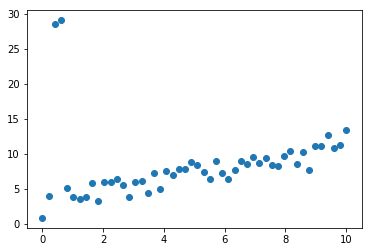

In [136]:
N = 50
x = np.linspace(0,10,N)
y = 3.1415926 + 0.87344*x + np.random.randn(N)

y[2:4] += 25

plt.scatter(x,y)


In [137]:
X = np.vstack([np.array([1]*N), x]).T

In [142]:
def OLS_L2(y,y_hat,l2,w):
    return (y - y_hat).dot(y - y_hat) + l2*w.T.dot(w)

def R2 (y, y_hat):
    return 1 - OLS(y, y_hat) / OLS(y,y.mean())

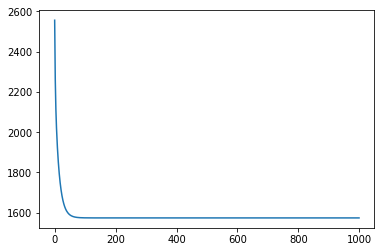

In [147]:

w = np.random.randn(X.shape[1])

J=[]

eta = 1e-3
epochs = int(1e3)
l2 = 25


for i in range ( epochs):
    y_hat = X.dot(w)
    J.append(OLS_L2(y,y_hat,l2,w))
    w -= eta*(X.T.dot(y_hat - y) + l2*w)

#plt.figure(figsize= (12,9))

plt.plot(J)

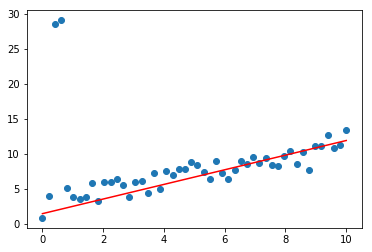

In [145]:
#plt.figure(figsize= (12,9))
plt.scatter(x,y)
plt.plot(x,y_hat, color = "red")

In [146]:
R2(y,y_hat)

-0.2743269120625327

N = 200

x2 = np.linspace(0,10,N)
y2 = 3.1415926 + 0.87344*x2 + np.random.randn(N)

X2 = np.vstack([np.array([1]*N), x2]).T
w2 = np.random.randn(X2.shape[1])

J2=[]

eta = 1e-6
epochs = int(1e3)
l2 = 25

for i in range ( epochs):
    y_hat2 = X2.dot(w2)
    J2.append(OLS_L2(y2,y_hat2,l2,w2))
    w2 -= eta*(X2.T.dot(y_hat2 - y2) + l2*w2.dot(w2))

plt.plot(J2)

plt.scatter(x2,y2)
plt.plot(x2,y_hat2, color = "red")


R2(y2,y_hat2)

noise = np.column_stack((X2 , np.random.randn(N,1)))
        #w = np.linalg.solve(X.T.dot(X), X.T.dot(y))
w_noise = np.linalg.solve(noise.T.dot(noise), noise.T.dot(y2))
y_hat3 = noise.dot(w_noise)


J3=[]

eta = 1e-6
epochs = int(1e3)
l2 = 25

for i in range ( epochs):
    y_hat3 = noise.dot(w_noise)
    J3.append(OLS_L2(y2,y_hat3,l2,w_noise))
    w_noise -= eta*(noise.T.dot(y_hat3 - y2) + l2*w_noise.dot(w_noise))

plt.plot(J3)

R2(y2,y_hat3)

plt.scatter(x2,y2)
plt.plot(x2,y_hat3, color = "red")